<a href="https://colab.research.google.com/github/aqibfirdous/DS-ML/blob/main/DiseasePrediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DISEASE PREDICTION#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [12]:
print(os.listdir())

['.config', 'U.S._Chronic_Disease_Indicators__CDI_.csv', 'sample_data']


In [20]:
df =  pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_.csv",low_memory=False)

In [31]:
import pandas as pd

# Read the CSV file with low_memory=False to suppress the warning
df = pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_.csv", low_memory=False)
df


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,41.0,CVD,CVD1_4,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4.0,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39.0,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59.0,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78.0,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,2011,2015,ND,North Dakota,Death Certificate,Cancer,"Invasive cancer (all sites combined), mortality",NaN,NaN,Average Annual Number,...,38.0,CAN,CAN4_2,AVGANNNMBR,RACE,BLK,NaN,NaN,NaN,NaN
112027,2008,2012,KS,Kansas,Death Certificate,Cancer,"Invasive cancer (all sites combined), mortality",NaN,NaN,Average Annual Number,...,20.0,CAN,CAN4_2,AVGANNNMBR,RACE,AIAO,NaN,NaN,NaN,NaN
112028,2015,2019,SD,South Dakota,Death Certificate,Cancer,"Invasive cancer (all sites combined), mortality",NaN,NaN,Average Annual Number,...,46.0,CAN,CAN4_2,AVGANNNMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
112029,2015,2019,NY,New York,Death Certificate,Cancer,"Invasive cancer (all sites combined), mortality",NaN,"per 100,000",Average Annual Crude Rate,...,36.0,CAN,CAN4_2,AVGANNCRDRATE,GENDER,GENF,NaN,NaN,NaN,NaN


In [32]:
total_rows_in_dataset = df.shape[0]


In [33]:
total_rows_in_dataset

112031

<Axes: >

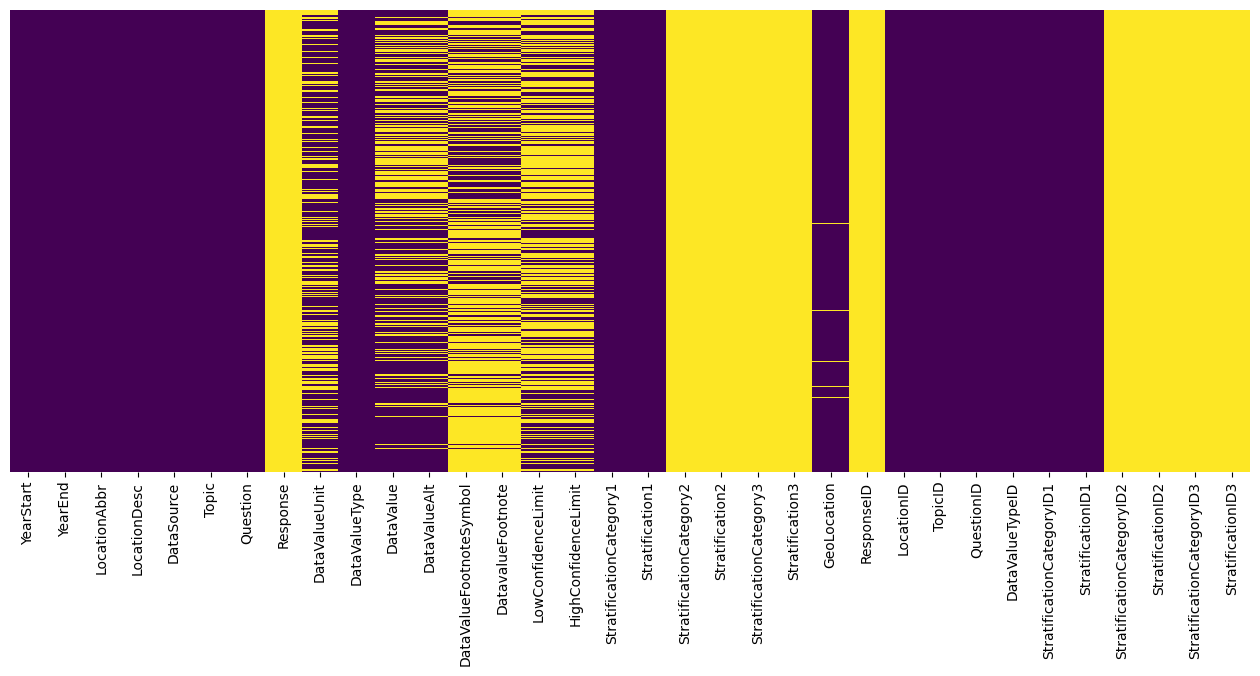

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [35]:
columns_to_fill = ['StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3',
                   'StratificationID3', 'Response','ResponseID','StratificationCategory2', 'Stratification2',
                   'StratificationCategory3', 'Stratification3','DataValueUnit', 'DataValue', 'DataValueFootnoteSymbol',
                   'DatavalueFootnote', 'GeoLocation','LowConfidenceLimit','HighConfidenceLimit','DataValueAlt']
fill_value = 9999

df.fillna({col: fill_value for col in columns_to_fill}, inplace=True)


<Axes: >

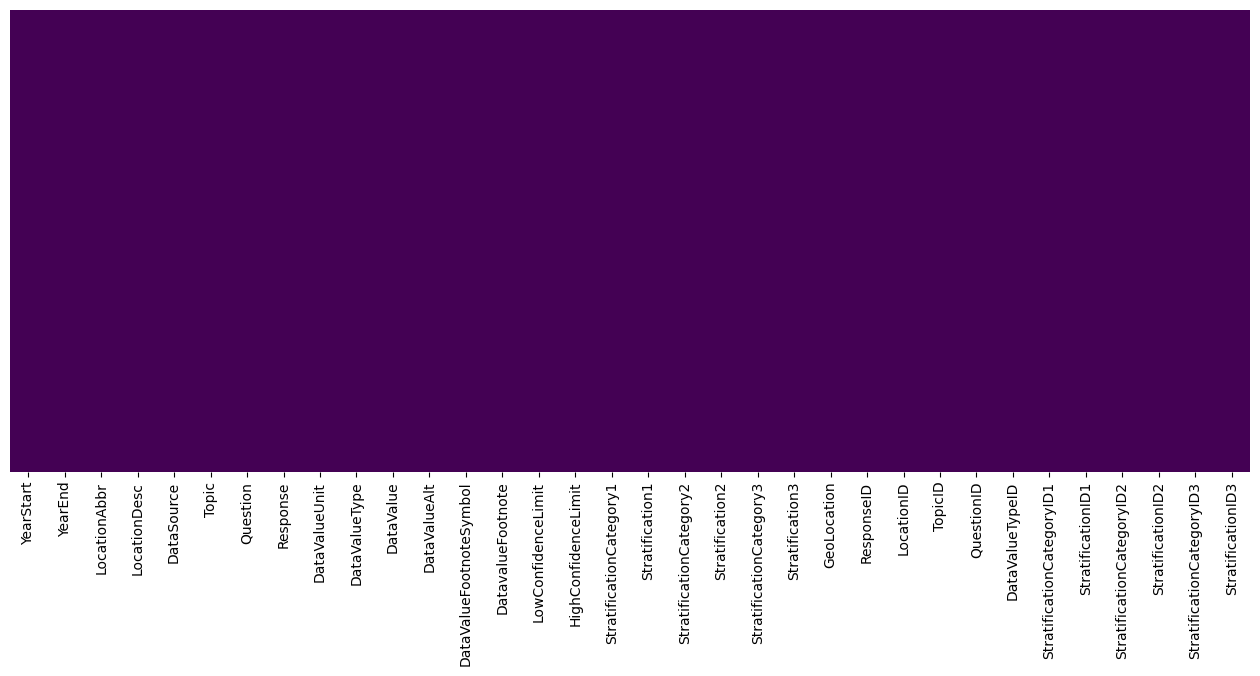

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  Topic  \
0               3        1            38            38           9      4   
1              12       10             3             2          16      0   
2              12       10            36            36          16      0   
3              12       10            46            46          16      0   
4               8        6            49            49          16      0   
...           ...      ...           ...           ...         ...    ...   
112026          4        6            29            35           6      3   
112027          1        3            17            17           6      3   
112028          8       10            43            43           6      3   
112029          8       10            35            33           6      3   
112030          7        9             0             1          13      3   

        Question  Response  DataValueUnit  DataValueType  ...  LocationID  

In [39]:
# Define a mapping to change the feature names to the provided format
column_mapping = {
    'YearStart': 'ECG Result',
    'YearEnd': 'Stress Test Result',
    'LocationAbbr': 'Lipid Profile (Cholesterol) Result',
    'LocationDesc': 'Coronary Angiography Result',
    'DataSource': 'Pulmonary Function Test Result (Spirometry)',
    'Topic': 'Topic',
    'Question': 'Chest X-ray Result',
    'Response': 'Allergy Test Result',
    'DataValueUnit': 'Mammography Result',
    'DataValueType': 'Colonoscopy Result',
    'DataValue': 'Pap Smear Result',
    'DataValueAlt': 'Biopsy Result',
    'DataValueFootnoteSymbol': 'Fasting Blood Sugar Test Result',
    'DatavalueFootnote': 'Oral Glucose Tolerance Test (OGTT) Result',
    'LowConfidenceLimit': 'Hemoglobin A1c Result',
    'HighConfidenceLimit': 'Urine Glucose Test Result',
    'StratificationCategory1': 'Clinical Interviews Result',
    'Stratification1': 'Psychological Questionnaires Result',
    'StratificationCategory2': 'Mental Status Examination Result',
    'Stratification2': 'DSM-5 Criteria Status',
    'StratificationCategory3': 'Patient Interviews Result',
    'Stratification3': 'Nicotine/Cotinine Blood Test Result',
    'GeoLocation': 'Breath Carbon Monoxide (CO) Test Result',
    'ResponseID': 'Blood Pressure Measurement',
    'LocationID': 'Kidney Function Test (for Chronic Kidney Disease)',
    'TopicID': 'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
    'QuestionID': 'Depression Screening Result (Mental Health)',
    'DataValueTypeID': 'Tobacco Usage Status',
    'StratificationCategoryID1': 'Body Mass Index (BMI)',
    'StratificationID1': 'Vaccination Status (Immunization)',
    'StratificationCategoryID2': 'Nutrition Assessment Result',
    'StratificationID2': 'Physical Activity Assessment Result',
    'StratificationCategoryID3': 'Disability Assessment Result',
    'StratificationID3': 'Older Adults'
}

# Rename the features based on the mapping
df.rename(columns=column_mapping, inplace=True)
df

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,95,0,2,14,...,33,6,71,13,2,0,0,0,0,0
1,12,10,3,2,16,0,2,0,1,9,...,31,0,1,8,0,6,0,0,0,0
2,12,10,36,36,16,0,2,0,1,9,...,30,0,1,8,0,7,0,0,0,0
3,12,10,46,46,16,0,2,0,1,9,...,48,0,1,8,2,4,0,0,0,0
4,8,6,49,49,16,0,2,0,1,9,...,52,0,1,8,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,4,6,29,35,6,3,78,0,2,7,...,29,3,44,6,2,5,0,0,0,0
112027,1,3,17,17,6,3,78,0,2,7,...,11,3,44,6,2,1,0,0,0,0
112028,8,10,43,43,6,3,78,0,2,7,...,37,3,44,6,1,11,0,0,0,0
112029,8,10,35,33,6,3,78,0,10,6,...,27,3,44,5,0,6,0,0,0,0


In [40]:
df.columns
df

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,95,0,2,14,...,33,6,71,13,2,0,0,0,0,0
1,12,10,3,2,16,0,2,0,1,9,...,31,0,1,8,0,6,0,0,0,0
2,12,10,36,36,16,0,2,0,1,9,...,30,0,1,8,0,7,0,0,0,0
3,12,10,46,46,16,0,2,0,1,9,...,48,0,1,8,2,4,0,0,0,0
4,8,6,49,49,16,0,2,0,1,9,...,52,0,1,8,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,4,6,29,35,6,3,78,0,2,7,...,29,3,44,6,2,5,0,0,0,0
112027,1,3,17,17,6,3,78,0,2,7,...,11,3,44,6,2,1,0,0,0,0
112028,8,10,43,43,6,3,78,0,2,7,...,37,3,44,6,1,11,0,0,0,0
112029,8,10,35,33,6,3,78,0,10,6,...,27,3,44,5,0,6,0,0,0,0


<Axes: >

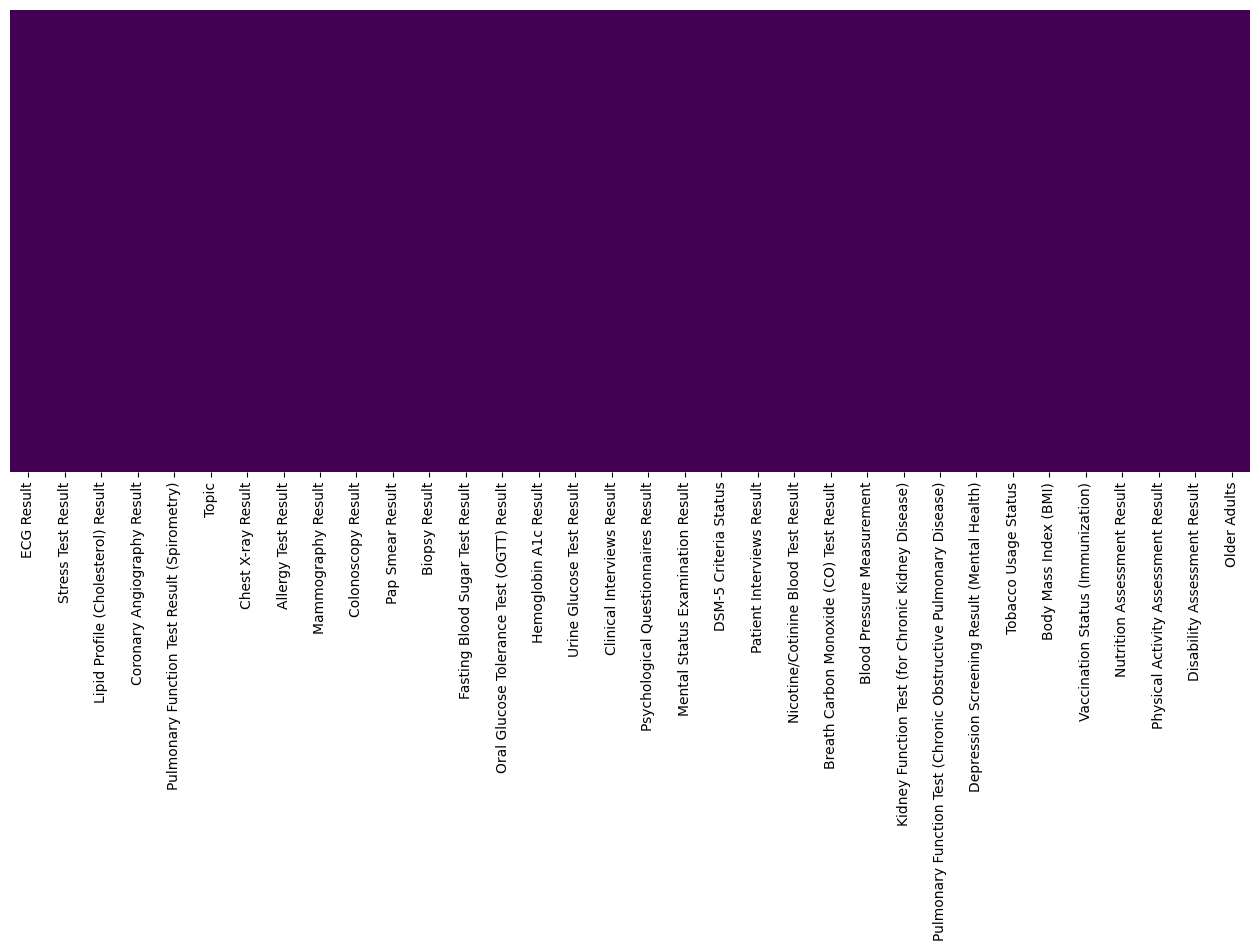

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data pre-processing

In [42]:
#handling the problem
df.isnull().sum()

ECG Result                                                         0
Stress Test Result                                                 0
Lipid Profile (Cholesterol) Result                                 0
Coronary Angiography Result                                        0
Pulmonary Function Test Result (Spirometry)                        0
Topic                                                              0
Chest X-ray Result                                                 0
Allergy Test Result                                                0
Mammography Result                                                 0
Colonoscopy Result                                                 0
Pap Smear Result                                                   0
Biopsy Result                                                      0
Fasting Blood Sugar Test Result                                    0
Oral Glucose Tolerance Test (OGTT) Result                          0
Hemoglobin A1c Result             

###Methods for Data Cleaning


In [43]:
df.fillna(method='ffill')

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,95,0,2,14,...,33,6,71,13,2,0,0,0,0,0
1,12,10,3,2,16,0,2,0,1,9,...,31,0,1,8,0,6,0,0,0,0
2,12,10,36,36,16,0,2,0,1,9,...,30,0,1,8,0,7,0,0,0,0
3,12,10,46,46,16,0,2,0,1,9,...,48,0,1,8,2,4,0,0,0,0
4,8,6,49,49,16,0,2,0,1,9,...,52,0,1,8,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,4,6,29,35,6,3,78,0,2,7,...,29,3,44,6,2,5,0,0,0,0
112027,1,3,17,17,6,3,78,0,2,7,...,11,3,44,6,2,1,0,0,0,0
112028,8,10,43,43,6,3,78,0,2,7,...,37,3,44,6,1,11,0,0,0,0
112029,8,10,35,33,6,3,78,0,10,6,...,27,3,44,5,0,6,0,0,0,0


In [44]:
df.interpolate()

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,95,0,2,14,...,33,6,71,13,2,0,0,0,0,0
1,12,10,3,2,16,0,2,0,1,9,...,31,0,1,8,0,6,0,0,0,0
2,12,10,36,36,16,0,2,0,1,9,...,30,0,1,8,0,7,0,0,0,0
3,12,10,46,46,16,0,2,0,1,9,...,48,0,1,8,2,4,0,0,0,0
4,8,6,49,49,16,0,2,0,1,9,...,52,0,1,8,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,4,6,29,35,6,3,78,0,2,7,...,29,3,44,6,2,5,0,0,0,0
112027,1,3,17,17,6,3,78,0,2,7,...,11,3,44,6,2,1,0,0,0,0
112028,8,10,43,43,6,3,78,0,2,7,...,37,3,44,6,1,11,0,0,0,0
112029,8,10,35,33,6,3,78,0,10,6,...,27,3,44,5,0,6,0,0,0,0


In [45]:
df.select_dtypes(object)

""
0
1
2
3
4
...
112026
112027
112028
112029


###Method

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                8                   1                                  32   
1                4                   2                                  23   
2                4                   2                                  30   
3                4                   2                                  41   
4               13                   9                                  44   
...            ...                 ...                                 ...   
112026           9                   9                                  22   
112027           1                   6                                   9   
112028          13                   2                                  38   
112029          13                   2                                  29   
112030          12                  12                                   0   

        Coronary Angiography Result  \
0                       

##Cleaned Dataset

<Axes: >

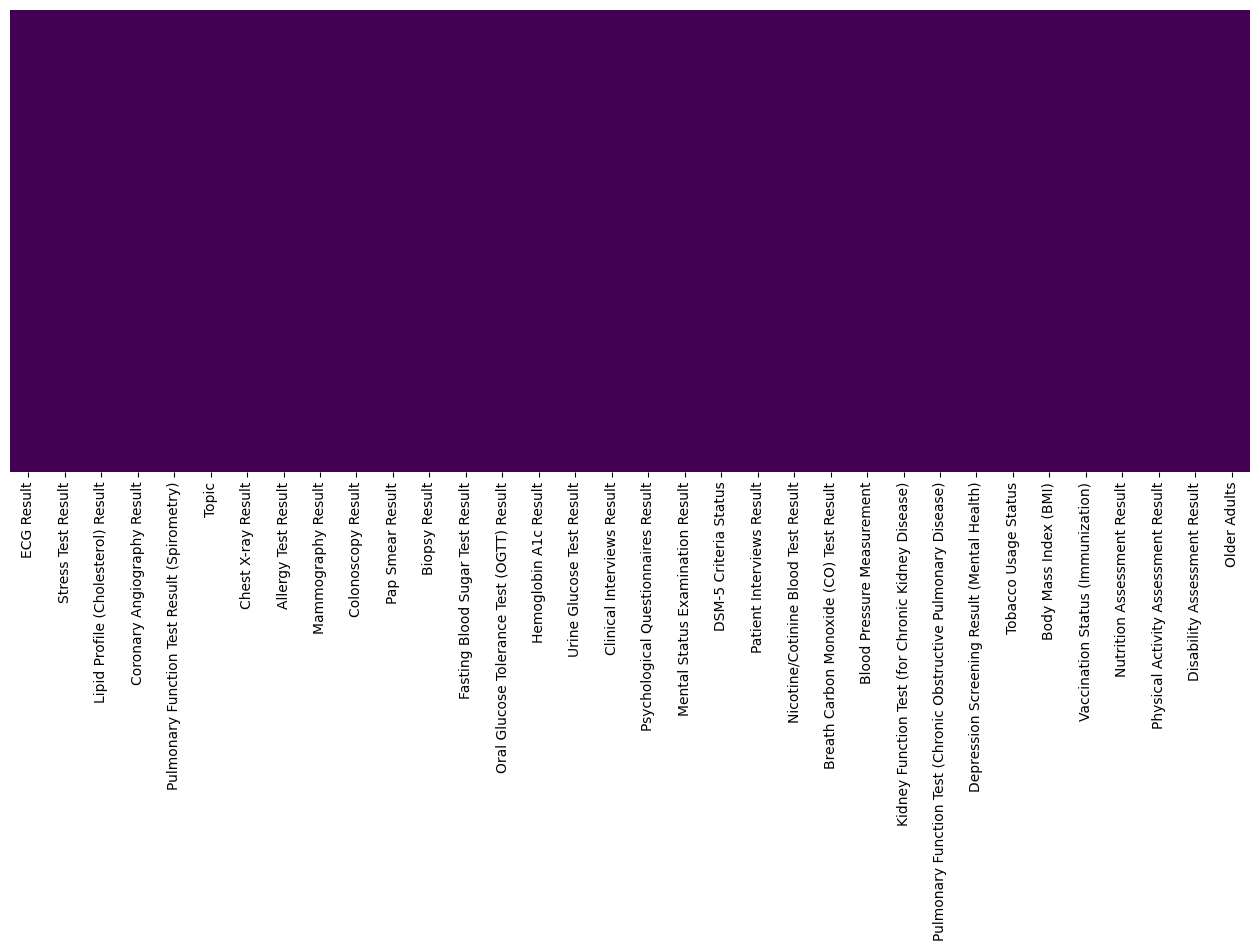

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Model Building

In [49]:
y=df['Topic']
y

0         11
1          0
2          0
3          0
4          0
          ..
112026    10
112027    10
112028    10
112029    10
112030    10
Name: Topic, Length: 112031, dtype: int64

In [50]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,1,32,32,16,141,0,3,6,8948,...,27,14,116,5,2,0,0,0,0,0
1,4,2,23,12,8,58,0,1,17,8656,...,25,0,1,16,0,10,0,0,0,0
2,4,2,30,30,8,58,0,1,17,7129,...,24,0,1,16,0,11,0,0,0,0
3,4,2,41,41,8,58,0,1,17,3952,...,43,0,1,16,2,8,0,0,0,0
4,13,9,44,44,8,58,0,1,17,3816,...,48,0,1,16,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,9,9,22,29,13,122,0,3,15,10769,...,22,11,86,14,2,9,0,0,0,0
112027,1,6,9,9,13,122,0,3,15,3816,...,3,11,86,14,2,1,0,0,0,0
112028,13,2,38,38,13,122,0,3,15,5439,...,31,11,86,14,1,3,0,0,0,0
112029,13,2,29,27,13,122,0,2,14,5594,...,20,11,86,13,0,10,0,0,0,0


### Splitting the training and testing data

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [52]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,12,12,28,22,5,121,0,2,14,8672,...,16,11,85,13,2,7,0,0,0,0
44473,13,9,24,21,16,35,0,3,6,3816,...,15,10,71,5,2,9,0,0,0,0
97052,13,2,20,20,5,121,0,2,14,11775,...,14,11,85,13,2,9,0,0,0,0
56666,10,10,49,48,5,126,0,3,15,9434,...,40,11,76,14,1,3,0,0,0,0
100779,13,2,47,47,5,121,0,3,15,9282,...,39,11,85,14,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,11,11,28,22,13,68,0,2,14,3002,...,16,11,77,13,2,9,0,0,0,0
77655,8,8,38,38,5,127,0,2,13,3816,...,31,11,78,12,2,12,0,0,0,0
79683,10,10,11,11,13,70,0,2,13,6848,...,5,11,79,12,1,3,0,0,0,0
56088,9,9,1,0,5,126,0,3,15,7025,...,0,11,76,14,0,10,0,0,0,0


In [53]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
106433,10,10,5,8,5,125,0,2,14,4829,...,55,11,87,13,0,10,0,0,0,0
36122,8,1,5,8,4,112,0,8,11,2077,...,55,10,69,10,1,3,0,0,0,0
17184,2,11,47,47,8,58,0,1,17,3816,...,39,0,1,16,0,10,0,0,0,0
103719,8,8,54,54,13,122,0,2,13,1204,...,23,11,86,12,2,1,0,0,0,0
88976,7,7,6,5,13,70,0,2,13,3816,...,52,11,79,12,2,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48472,9,5,11,11,16,35,0,7,11,3816,...,5,10,71,10,2,12,0,0,0,0
65932,1,6,36,36,13,68,0,2,13,3816,...,29,11,77,12,2,12,0,0,0,0
43779,14,10,26,25,4,112,0,3,6,3816,...,18,10,69,5,2,0,0,0,0,0
33173,12,8,51,51,4,112,0,8,11,3816,...,50,10,69,10,2,6,0,0,0,0


In [55]:
y_train

92167     10
44473      9
97052     10
56666     10
100779    10
          ..
65615     10
77655     10
79683     10
56088     10
38408      9
Name: Topic, Length: 89624, dtype: int64

In [56]:
y_test

106433    10
36122      9
17184      0
103719    10
88976     10
          ..
48472      9
65932     10
43779      9
33173      9
95090     10
Name: Topic, Length: 22407, dtype: int64

In [57]:
print(df['Topic'].unique())


[11  0  1  9 10 12 13  2  8  6  5  7 14 16  3 15  4]


##XGBOOST ALGORITHM

In [58]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)',
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults']]
y = df['Topic']
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to your class labels (training and test combined)
all_labels = pd.concat([y_train, y_test], axis=0)
label_encoder.fit(all_labels)

# Transform both the training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost classifier with the encoded class labels
model = xgb.XGBClassifier()
model.fit(x_train, y_train_encoded)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train_encoded, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Print the predictions
print("Predictions on the training set:", y_xgb_train_pred)
print("Predictions on the test set:", y_xgb_test_pred)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9999553710893917
Predictions on the training set: [10  9 10 ... 10 10  9]
Predictions on the test set: [10  9  0 ...  9  9 10]
Training Accuracy: 1.0
Test Accuracy: 0.9999553710893917


### Model

In [59]:
import joblib

# Save the trained model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(model, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [60]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,1,32,32,16,141,0,3,6,8948,...,27,14,116,5,2,0,0,0,0,0
1,4,2,23,12,8,58,0,1,17,8656,...,25,0,1,16,0,10,0,0,0,0
2,4,2,30,30,8,58,0,1,17,7129,...,24,0,1,16,0,11,0,0,0,0
3,4,2,41,41,8,58,0,1,17,3952,...,43,0,1,16,2,8,0,0,0,0
4,13,9,44,44,8,58,0,1,17,3816,...,48,0,1,16,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,9,9,22,29,13,122,0,3,15,10769,...,22,11,86,14,2,9,0,0,0,0
112027,1,6,9,9,13,122,0,3,15,3816,...,3,11,86,14,2,1,0,0,0,0
112028,13,2,38,38,13,122,0,3,15,5439,...,31,11,86,14,1,3,0,0,0,0
112029,13,2,29,27,13,122,0,2,14,5594,...,20,11,86,13,0,10,0,0,0,0


In [61]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (112031, 33)
Shape of y: (112031,)


In [62]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,12,12,28,22,5,121,0,2,14,8672,...,16,11,85,13,2,7,0,0,0,0
44473,13,9,24,21,16,35,0,3,6,3816,...,15,10,71,5,2,9,0,0,0,0
97052,13,2,20,20,5,121,0,2,14,11775,...,14,11,85,13,2,9,0,0,0,0
56666,10,10,49,48,5,126,0,3,15,9434,...,40,11,76,14,1,3,0,0,0,0
100779,13,2,47,47,5,121,0,3,15,9282,...,39,11,85,14,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,11,11,28,22,13,68,0,2,14,3002,...,16,11,77,13,2,9,0,0,0,0
77655,8,8,38,38,5,127,0,2,13,3816,...,31,11,78,12,2,12,0,0,0,0
79683,10,10,11,11,13,70,0,2,13,6848,...,5,11,79,12,1,3,0,0,0,0
56088,9,9,1,0,5,126,0,3,15,7025,...,0,11,76,14,0,10,0,0,0,0


In [64]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,12,12,28,22,5,121,0,2,14,8672,...,16,11,85,13,2,7,0,0,0,0
44473,13,9,24,21,16,35,0,3,6,3816,...,15,10,71,5,2,9,0,0,0,0
97052,13,2,20,20,5,121,0,2,14,11775,...,14,11,85,13,2,9,0,0,0,0
56666,10,10,49,48,5,126,0,3,15,9434,...,40,11,76,14,1,3,0,0,0,0
100779,13,2,47,47,5,121,0,3,15,9282,...,39,11,85,14,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,11,11,28,22,13,68,0,2,14,3002,...,16,11,77,13,2,9,0,0,0,0
77655,8,8,38,38,5,127,0,2,13,3816,...,31,11,78,12,2,12,0,0,0,0
79683,10,10,11,11,13,70,0,2,13,6848,...,5,11,79,12,1,3,0,0,0,0
56088,9,9,1,0,5,126,0,3,15,7025,...,0,11,76,14,0,10,0,0,0,0


In [65]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
106433,10,10,5,8,5,125,0,2,14,4829,...,55,11,87,13,0,10,0,0,0,0
36122,8,1,5,8,4,112,0,8,11,2077,...,55,10,69,10,1,3,0,0,0,0
17184,2,11,47,47,8,58,0,1,17,3816,...,39,0,1,16,0,10,0,0,0,0
103719,8,8,54,54,13,122,0,2,13,1204,...,23,11,86,12,2,1,0,0,0,0
88976,7,7,6,5,13,70,0,2,13,3816,...,52,11,79,12,2,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48472,9,5,11,11,16,35,0,7,11,3816,...,5,10,71,10,2,12,0,0,0,0
65932,1,6,36,36,13,68,0,2,13,3816,...,29,11,77,12,2,12,0,0,0,0
43779,14,10,26,25,4,112,0,3,6,3816,...,18,10,69,5,2,0,0,0,0,0
33173,12,8,51,51,4,112,0,8,11,3816,...,50,10,69,10,2,6,0,0,0,0


In [66]:
y_train

92167     10
44473      9
97052     10
56666     10
100779    10
          ..
65615     10
77655     10
79683     10
56088     10
38408      9
Name: Topic, Length: 89624, dtype: int64

In [67]:
y_test

106433    10
36122      9
17184      0
103719    10
88976     10
          ..
48472      9
65932     10
43779      9
33173      9
95090     10
Name: Topic, Length: 22407, dtype: int64

##DECISION TREE

###Accuracy of Decision Tree

In [68]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into a training set and a testing set (you can also use cross-validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can visualize the decision tree
# This requires the graphviz library to be installed
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
#plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names)
#plt.show()


Accuracy: 1.0


In [69]:
feature_names = df.columns.tolist()
# Assuming the target column is named 'target', extract class names
class_names = df['Topic'].unique().tolist()

print("Feature Names:", feature_names)
print("Class Names:", class_names)


Feature Names: ['ECG Result', 'Stress Test Result', 'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result', 'Pulmonary Function Test Result (Spirometry)', 'Topic', 'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result', 'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result', 'Fasting Blood Sugar Test Result', 'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result', 'Urine Glucose Test Result', 'Clinical Interviews Result', 'Psychological Questionnaires Result', 'Mental Status Examination Result', 'DSM-5 Criteria Status', 'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result', 'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement', 'Kidney Function Test (for Chronic Kidney Disease)', 'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)', 'Depression Screening Result (Mental Health)', 'Tobacco Usage Status', 'Body Mass Index (BMI)', 'Vaccination Status (Immunization)', 'Nutrition Assessment Result', 'Physica

### Plot of Decision Tree

In [70]:
unique_classes = df['Topic'].unique()  # Replace 'Topic' with your actual target variable name
print(unique_classes)

[11  0  1  9 10 12 13  2  8  6  5  7 14 16  3 15  4]


In [71]:
(np.unique(y_train))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [72]:
dtc.n_classes_

17

In [73]:
class_names

[11, 0, 1, 9, 10, 12, 13, 2, 8, 6, 5, 7, 14, 16, 3, 15, 4]

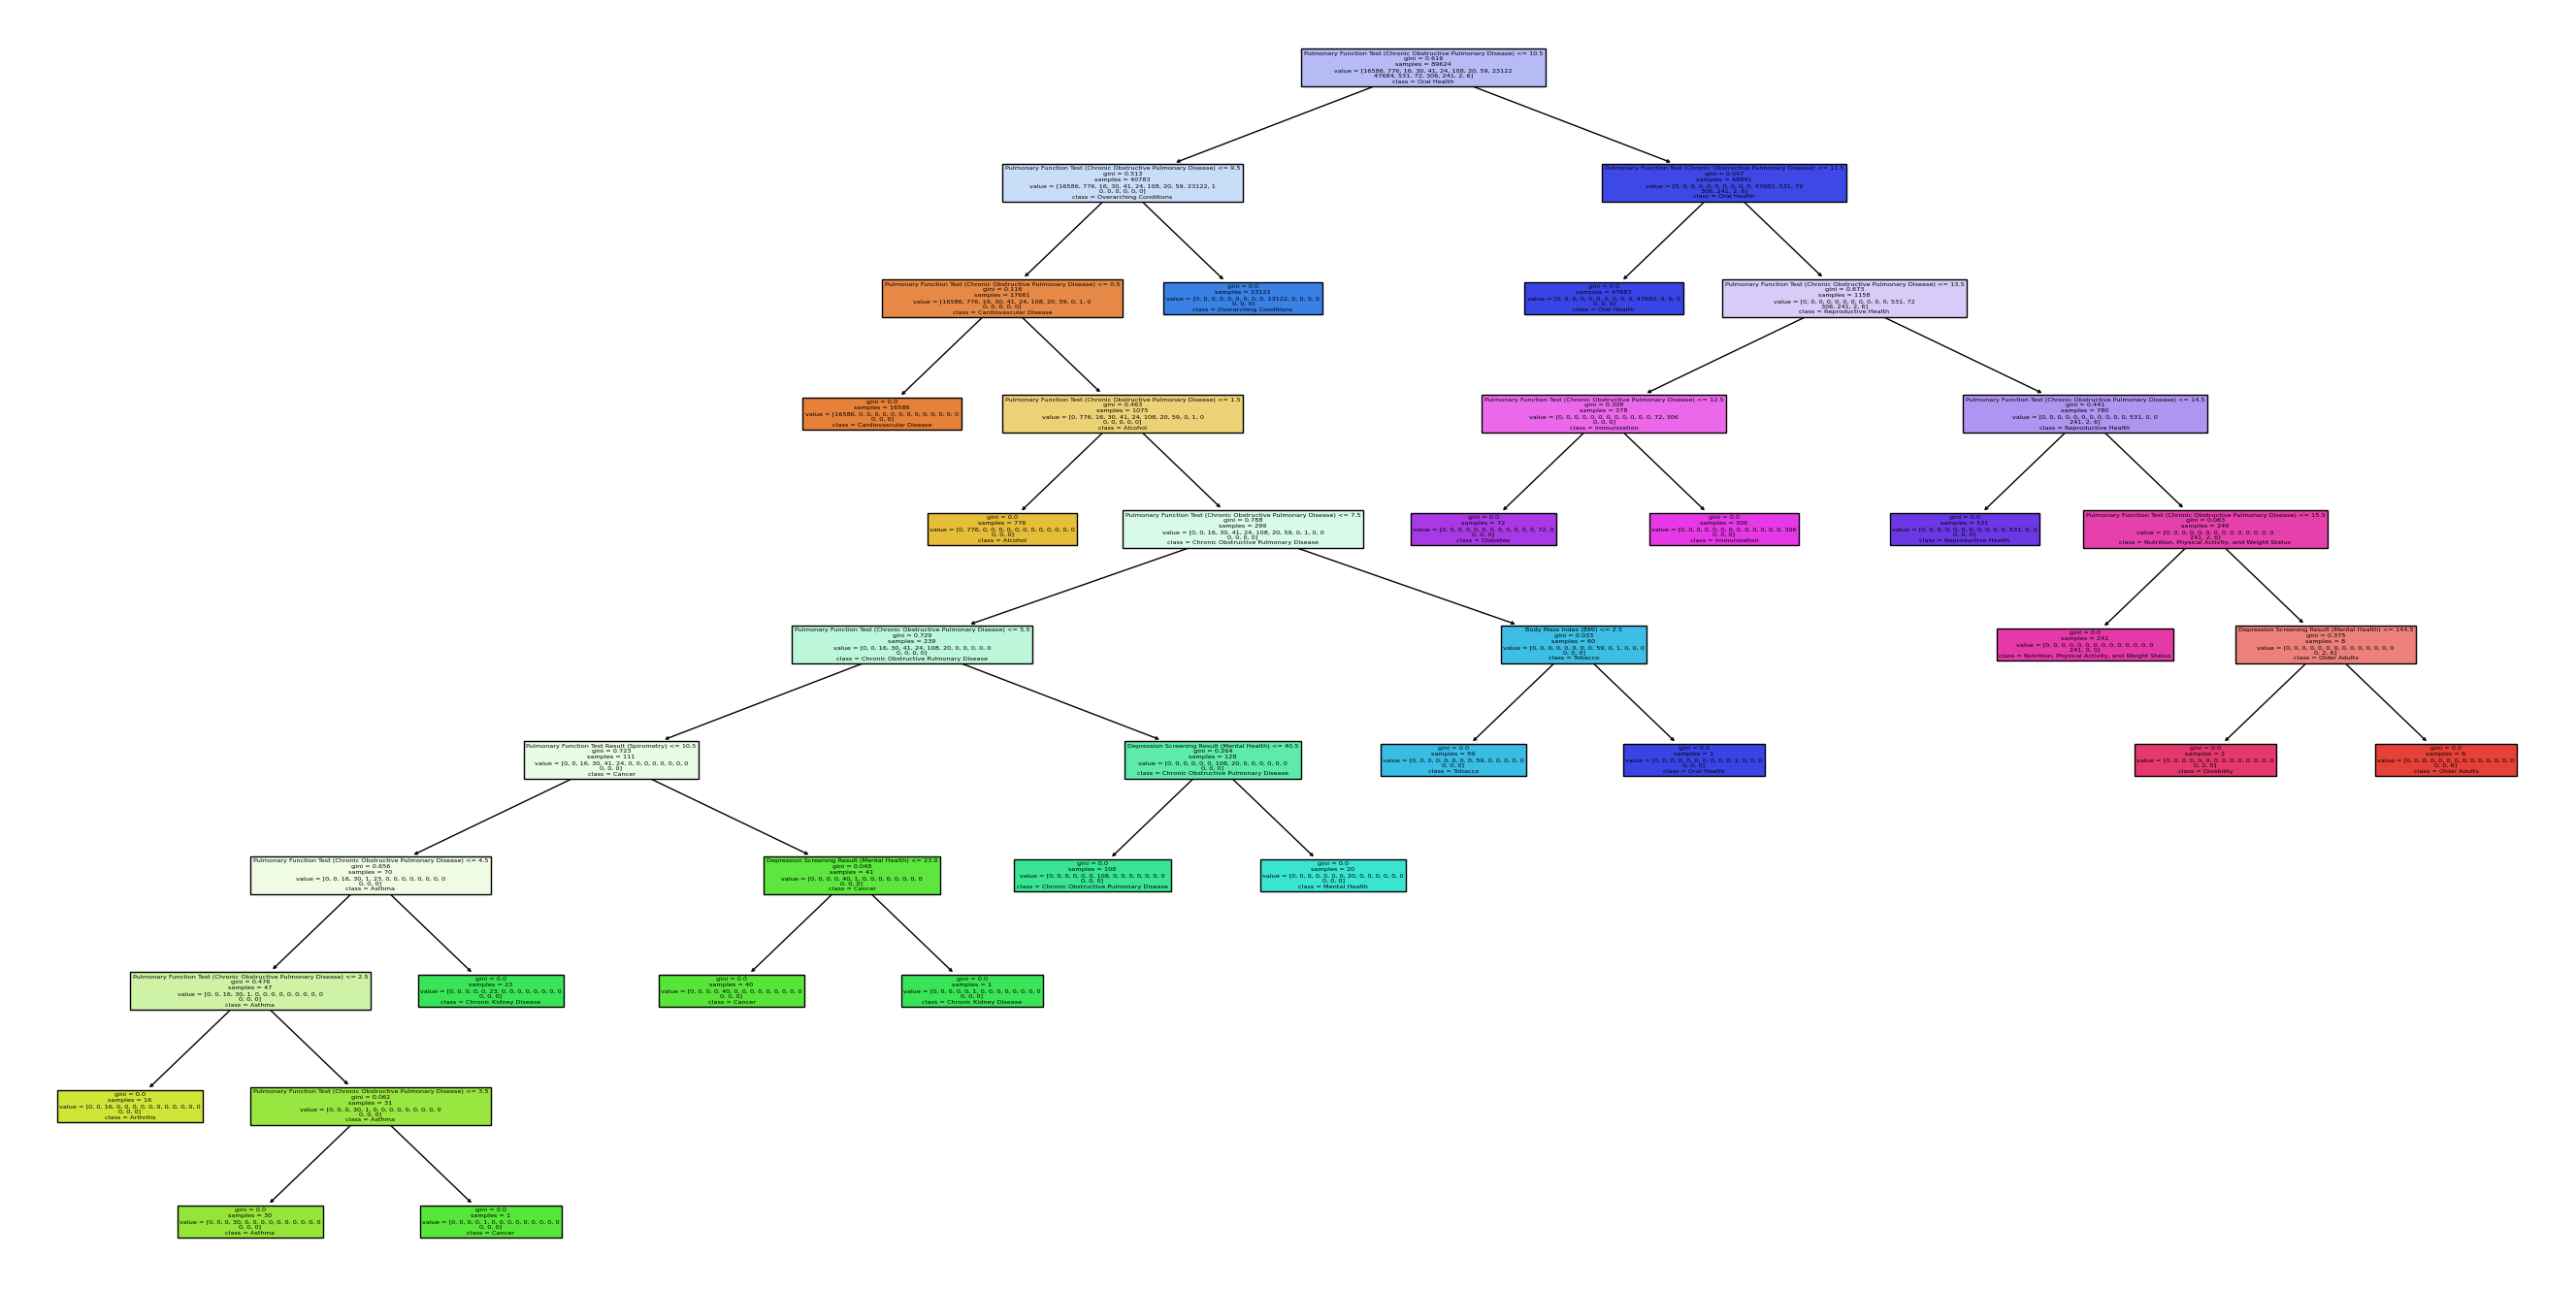

In [74]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Define class names with 17 classes
class_names = ['Cardiovascular Disease', 'Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Chronic Kidney Disease',
               'Chronic Obstructive Pulmonary Disease', 'Mental Health', 'Tobacco', 'Overarching Conditions',
               'Oral Health', 'Reproductive Health', 'Diabetes', 'Immunization', 'Nutrition, Physical Activity, and Weight Status',
               'Disability', 'Older Adults']

plt.figure(figsize=(34, 17))
plot_tree(dtc, filled=True, feature_names=['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)','Topic'
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults'],
class_names=class_names)

plt.show()


### Model

In [75]:
import joblib

# Save the trained Decision Tree model to a file
model_filename = 'decision_tree_model.pkl'
joblib.dump(dtc, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [76]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'class_column' is the name of the column containing class labels
num_classes = df['Topic'].nunique()
print("Number of classes:", num_classes)


Number of classes: 17


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0               13                   1                                  26   
1                9                   5                                  16   
2                9                   5                                  24   
3                9                   5                                  36   
4                5                  12                                  39   
...            ...                 ...                                 ...   
112026          14                  12                                  15   
112027           1                   9                                  54   
112028           5                   5                                  32   
112029           5                   5                                  22   
112030           4                   4                                   0   

        Coronary Angiography Result  \
0                       

<Axes: >

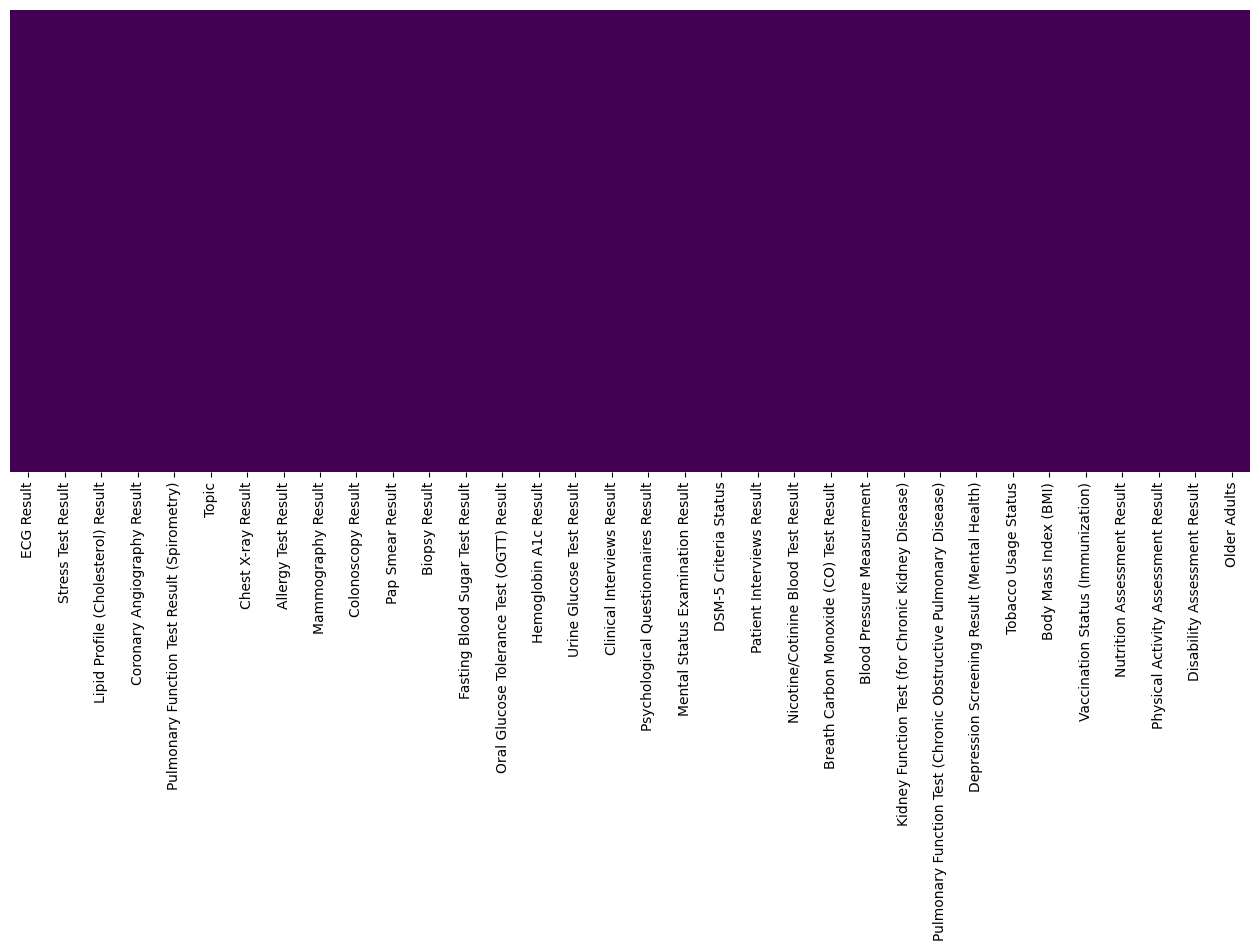

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
y=df['Topic']
y

0         3
1         0
2         0
3         0
4         0
         ..
112026    2
112027    2
112028    2
112029    2
112030    2
Name: Topic, Length: 112031, dtype: int64

In [81]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,13,1,26,26,8,48,0,4,14,12273,...,20,6,20,13,2,0,0,0,0,0
1,9,5,16,4,15,100,0,1,9,11949,...,18,0,1,8,0,2,0,0,0,0
2,9,5,24,24,15,100,0,1,9,10253,...,17,0,1,8,0,3,0,0,0,0
3,9,5,36,36,15,100,0,1,9,6723,...,38,0,1,8,2,12,0,0,0,0
4,5,12,39,39,15,100,0,1,9,6572,...,43,0,1,8,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,14,12,15,22,5,27,0,4,7,857,...,15,3,132,6,2,13,0,0,0,0
112027,1,9,54,54,5,27,0,4,7,6572,...,23,3,132,6,2,1,0,0,0,0
112028,5,5,32,32,5,27,0,4,7,8375,...,25,3,132,6,1,7,0,0,0,0
112029,5,5,22,20,5,27,0,3,6,8547,...,13,3,132,5,0,2,0,0,0,0


In [82]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (112031, 33)
Shape of y: (112031,)


In [83]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,4,4,21,15,12,26,0,3,6,11967,...,8,3,131,5,2,11,0,0,0,0
44473,5,12,17,14,8,75,0,4,14,6572,...,7,2,116,13,2,13,0,0,0,0
97052,5,5,13,13,12,26,0,3,6,1975,...,6,3,131,5,2,13,0,0,0,0
56666,2,2,44,43,12,31,0,4,7,12814,...,35,3,121,6,1,7,0,0,0,0
100779,5,5,42,42,12,26,0,4,7,12645,...,33,3,131,6,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,3,3,21,15,5,111,0,3,6,5669,...,8,3,122,5,2,13,0,0,0,0
77655,13,11,32,32,12,32,0,3,5,6572,...,25,3,123,4,2,4,0,0,0,0
79683,2,2,3,3,5,114,0,3,5,9940,...,45,3,124,4,1,7,0,0,0,0
56088,14,12,1,0,12,31,0,4,7,10138,...,0,3,121,6,0,2,0,0,0,0


In [84]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
106433,2,2,45,53,12,30,0,3,6,7697,...,51,3,133,5,0,2,0,0,0,0
36122,13,1,45,53,11,16,0,9,3,4640,...,51,2,113,2,1,7,0,0,0,0
17184,7,3,42,42,15,100,0,1,9,6572,...,33,0,1,8,0,2,0,0,0,0
103719,13,11,50,50,5,27,0,3,5,2270,...,16,3,132,4,2,1,0,0,0,0
88976,12,10,51,45,5,114,0,3,5,6572,...,48,3,124,4,2,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48472,14,8,3,3,8,75,0,8,3,6572,...,45,2,116,2,2,4,0,0,0,0
65932,1,9,30,30,5,111,0,3,5,6572,...,22,3,122,4,2,4,0,0,0,0
43779,6,2,19,18,11,16,0,4,14,6572,...,10,2,113,13,2,0,0,0,0,0
33173,4,11,47,47,11,16,0,9,3,6572,...,46,2,113,2,2,10,0,0,0,0


In [85]:
y_train

array([2, 2, 2, ..., 0, 2, 2])

In [86]:
y_test

array([ 2,  2,  2, ...,  2, 16,  2])

##ANN ALGORITHM

In [90]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the number of classes
num_classes = 17  # Change this to the actual number of classes

# Create a function that builds the ANN model
def build_model(dropout_rate=0.5):
    model = keras.Sequential([
        layers.Input(shape=(x_train_scaled.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dropout_rate': [0.3, 0.4, 0.5],
    'batch_size': [64, 128],
    'num_epochs': [50, 100]
}

# Initialize K-Fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize variables to store the best hyperparameters and accuracy
best_hyperparameters = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for dropout_rate in param_grid['dropout_rate']:
    for batch_size in param_grid['batch_size']:
        for num_epochs in param_grid['num_epochs']:
            print(f"Training model with dropout={dropout_rate}, batch_size={batch_size}, num_epochs={num_epochs}")

            # Build the model
            model = build_model(dropout_rate=dropout_rate)

            # Train the model
            model.fit(x_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

            # Evaluate accuracy on the validation set
            y_val_pred = model.predict(x_test_scaled)
            y_val_pred_classes = np.argmax(y_val_pred, axis=1)
            accuracy_val = accuracy_score(y_test, y_val_pred_classes)

            print(f"Validation accuracy: {accuracy_val:.4f}\n")

            # Check if this model has the best accuracy so far
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_hyperparameters = {
                    'dropout_rate': dropout_rate,
                    'batch_size': batch_size,
                    'num_epochs': num_epochs
                }

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)
# Build and train the best model with the optimal hyperparameters
best_model = build_model(dropout_rate=best_hyperparameters['dropout_rate'])
best_model.fit(x_train_scaled, y_train, epochs=best_hyperparameters['num_epochs'], batch_size=best_hyperparameters['batch_size'], verbose=2)

# Save the best model using joblib
joblib.dump(best_model, "best_ann_model.pkl")

Training model with dropout=0.3, batch_size=64, num_epochs=50
Epoch 1/50


Exception ignored in: <function _xla_gc_callback at 0x7c7ccc139090>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1401/1401 [==============================] - 68s 5ms/step - loss: 0.1890 - accuracy: 0.9562
Epoch 2/50
1401/1401 [==============================] - 8s 6ms/step - loss: 0.0273 - accuracy: 0.9920
Epoch 3/50
1401/1401 [==============================] - 7s 5ms/step - loss: 0.0184 - accuracy: 0.9946
Epoch 4/50
1401/1401 [==============================] - 8s 6ms/step - loss: 0.0148 - accuracy: 0.9957
Epoch 5/50
1401/1401 [==============================] - 8s 6ms/step - loss: 0.0137 - accuracy: 0.9960
Epoch 6/50
1401/1401 [==============================] - 7s 5ms/step - loss: 0.0140 - accuracy: 0.9962
Epoch 7/50
1401/1401 [==============================] - 7s 5ms/step - loss: 0.0109 - accuracy: 0.9968
Epoch 8/50
1401/1401 [==============================] - 7s 5ms/step - loss: 0.0095 - accuracy: 0.9970
Epoch 9/50
1401/1401 [==============================] - 8s 6ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 10/50
1401/1401 [==============================] - 7s 5ms/step - loss: 0.0090 - accura

['best_ann_model.pkl']

##KNN AKGORITHM

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                5                   1                                  19   
1               14                   8                                   8   
2               14                   8                                  17   
3               14                   8                                  30   
4               10                   4                                  33   
...            ...                 ...                                 ...   
112026           6                   4                                   7   
112027           1                  12                                  50   
112028          10                   8                                  26   
112029          10                   8                                  15   
112030           9                   7                                   0   

        Coronary Angiography Result  \
0                       

In [93]:
y=df['Topic']
y

0         10
1          0
2          0
3          0
4          0
          ..
112026     9
112027     9
112028     9
112029     9
112030     9
Name: Topic, Length: 112031, dtype: int64

In [94]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,5,1,19,19,15,89,0,5,6,2529,...,13,14,60,5,2,0,0,0,0,0
1,14,8,8,34,7,3,0,1,17,2168,...,10,0,1,16,0,6,0,0,0,0
2,14,8,17,17,7,3,0,1,17,285,...,9,0,1,16,0,7,0,0,0,0
3,14,8,30,30,7,3,0,1,17,9802,...,32,0,1,16,2,4,0,0,0,0
4,10,4,33,33,7,3,0,1,17,9634,...,38,0,1,16,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,6,4,7,15,12,66,0,5,15,11853,...,7,11,38,14,2,5,0,0,0,0
112027,1,12,50,50,12,66,0,5,15,9634,...,16,11,38,14,2,1,0,0,0,0
112028,10,8,26,26,12,66,0,5,15,11637,...,18,11,38,14,1,11,0,0,0,0
112029,10,8,15,13,12,66,0,4,14,11828,...,5,11,38,13,0,6,0,0,0,0


In [95]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,9,7,14,7,4,65,0,4,14,2188,...,54,11,37,13,2,3,0,0,0,0
44473,10,4,9,6,15,119,0,5,6,9634,...,53,10,20,5,2,5,0,0,0,0
97052,10,8,5,5,4,65,0,4,14,4526,...,52,11,37,13,2,5,0,0,0,0
56666,7,5,39,38,4,71,0,5,15,3130,...,29,11,26,14,1,11,0,0,0,0
100779,10,8,37,37,4,65,0,5,15,2942,...,27,11,37,14,2,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,8,6,14,7,12,15,0,4,14,8630,...,54,11,27,13,2,5,0,0,0,0
77655,5,3,26,26,4,72,0,4,13,9634,...,18,11,28,12,2,8,0,0,0,0
79683,7,5,23,23,12,18,0,4,13,13376,...,40,11,29,12,1,11,0,0,0,0
56088,6,4,1,0,4,71,0,5,15,157,...,0,11,26,14,0,6,0,0,0,0


In [97]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,9,7,14,7,4,65,0,4,14,2188,...,54,11,37,13,2,3,0,0,0,0
44473,10,4,9,6,15,119,0,5,6,9634,...,53,10,20,5,2,5,0,0,0,0
97052,10,8,5,5,4,65,0,4,14,4526,...,52,11,37,13,2,5,0,0,0,0
56666,7,5,39,38,4,71,0,5,15,3130,...,29,11,26,14,1,11,0,0,0,0
100779,10,8,37,37,4,65,0,5,15,2942,...,27,11,37,14,2,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,8,6,14,7,12,15,0,4,14,8630,...,54,11,27,13,2,5,0,0,0,0
77655,5,3,26,26,4,72,0,4,13,9634,...,18,11,28,12,2,8,0,0,0,0
79683,7,5,23,23,12,18,0,4,13,13376,...,40,11,29,12,1,11,0,0,0,0
56088,6,4,1,0,4,71,0,5,15,157,...,0,11,26,14,0,6,0,0,0,0


In [98]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
106433,7,5,40,49,4,70,0,4,14,10883,...,47,11,39,13,0,6,0,0,0,0
36122,5,1,40,49,3,54,0,10,11,7488,...,47,10,17,10,1,11,0,0,0,0
17184,12,6,37,37,7,3,0,1,17,9634,...,27,0,1,16,0,6,0,0,0,0
103719,5,3,46,46,12,66,0,4,13,4855,...,8,11,38,12,2,1,0,0,0,0
88976,4,2,47,40,12,18,0,4,13,9634,...,43,11,29,12,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48472,6,11,23,23,15,119,0,9,11,9634,...,40,10,20,10,2,8,0,0,0,0
65932,1,12,24,24,12,15,0,4,13,9634,...,15,11,27,12,2,8,0,0,0,0
43779,11,5,11,10,3,54,0,5,6,9634,...,2,10,17,5,2,0,0,0,0,0
33173,9,3,42,42,3,54,0,10,11,9634,...,41,10,17,10,2,2,0,0,0,0


In [99]:
y_train

92167     9
44473     8
97052     9
56666     9
100779    9
         ..
65615     9
77655     9
79683     9
56088     9
38408     8
Name: Topic, Length: 89624, dtype: int64

In [100]:
y_test

106433    9
36122     8
17184     0
103719    9
88976     9
         ..
48472     8
65932     9
43779     8
33173     8
95090     9
Name: Topic, Length: 22407, dtype: int64

In [101]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Hyperparameter tuning
k_neighbors = 5  # You can adjust this hyperparameter
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accs = []
val_accs = []

for train_index, val_index in kf.split(x_train_scaled):
    x_train_fold, x_val_fold = x_train_scaled[train_index], x_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the KNN model to the training fold
    knn_model.fit(x_train_fold, y_train_fold)

    # Evaluate accuracy on the training fold
    train_pred = knn_model.predict(x_train_fold)
    train_acc = accuracy_score(y_train_fold, train_pred)
    train_accs.append(train_acc)

    # Evaluate accuracy on the validation fold
    val_pred = knn_model.predict(x_val_fold)
    val_acc = accuracy_score(y_val_fold, val_pred)
    val_accs.append(val_acc)

mean_train_acc = np.mean(train_accs)
std_train_acc = np.std(train_accs)
mean_val_acc = np.mean(val_accs)
std_val_acc = np.std(val_accs)

print(f"Mean Training Accuracy: {mean_train_acc:.4f} ± {std_train_acc:.4f}")
print(f"Mean Validation Accuracy: {mean_val_acc:.4f} ± {std_val_acc:.4f}")

# Fit the final KNN model on the entire training data
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the validation and test sets
val_pred = knn_model.predict(x_val_scaled)
test_pred = knn_model.predict(x_test_scaled)

# Calculate accuracy on the validation and test sets
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

from sklearn.metrics import classification_report
# Calculate the classification report with zero division handling
class_report = classification_report(y_test, test_pred, zero_division=0)

# Print classification report for more detailed evaluation
print("Validation Set Accuracy:", val_accuracy)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report for Test Set:")
print(classification_report(y_test, test_pred, zero_division=0))

Mean Training Accuracy: 0.9902 ± 0.0001
Mean Validation Accuracy: 0.9871 ± 0.0008
Validation Set Accuracy: 0.9871129707112971
Test Set Accuracy: 0.9875485339402865
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4184
           1       0.98      0.93      0.96       197
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         7
           5       0.71      0.58      0.64        26
           6       0.50      1.00      0.67         4
           7       0.70      0.50      0.58        14
           8       0.98      1.00      0.99      5810
           9       1.00      1.00      1.00     11844
          10       0.57      0.42      0.48       143
          11       0.00      0.00      0.00        19
          12       0.74      0.26      0.38        77
          13       0.55      0.21      0.31

In [102]:

import joblib
# Specify the filename for the saved model
model_filename = 'knn_model.pkl'
# Save the KNN model using Joblib
joblib.dump(knn_model, model_filename)
print(f"KNN model has been saved as '{model_filename}'.")

KNN model has been saved as 'knn_model.pkl'.


##SVM ALGORITHM

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [106]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0               10                   1                                  11   
1                6                  11                                  53   
2                6                  11                                   9   
3                6                  11                                  24   
4                2                   7                                  27   
...            ...                 ...                                 ...   
112026          11                   7                                  52   
112027           1                   4                                  46   
112028           2                  11                                  19   
112029           2                  11                                   7   
112030          14                  10                                   0   

        Coronary Angiography Result  \
0                       

In [107]:
y=df['Topic']
y

0          2
1          0
2          0
3          0
4          0
          ..
112026    16
112027    16
112028    16
112029    16
112030    16
Name: Topic, Length: 112031, dtype: int64

In [108]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,10,1,11,11,7,134,0,6,14,5142,...,5,6,104,13,2,0,0,0,0,0
1,6,11,53,28,14,69,0,1,9,4741,...,2,0,1,8,0,10,0,0,0,0
2,6,11,9,9,14,69,0,1,9,5498,...,55,0,1,8,0,11,0,0,0,0
3,6,11,24,24,14,69,0,1,9,13223,...,26,0,1,8,2,8,0,0,0,0
4,2,7,27,27,14,69,0,1,9,13036,...,32,0,1,8,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,11,7,52,7,4,109,0,6,7,2062,...,53,3,79,6,2,9,0,0,0,0
112027,1,4,46,46,4,109,0,6,7,13036,...,8,3,79,6,2,1,0,0,0,0
112028,2,11,19,19,4,109,0,6,7,1822,...,10,3,79,6,1,3,0,0,0,0
112029,2,11,7,5,4,109,0,5,6,2034,...,45,3,79,5,0,10,0,0,0,0


In [109]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,14,10,6,52,11,108,0,5,6,4763,...,50,3,78,5,2,7,0,0,0,0
44473,2,7,54,51,7,23,0,6,14,13036,...,49,2,60,13,2,9,0,0,0,0
97052,2,11,45,45,11,108,0,5,6,7361,...,48,3,78,5,2,9,0,0,0,0
56666,12,8,33,32,11,115,0,6,7,5811,...,22,3,66,6,1,3,0,0,0,0
100779,2,11,31,31,11,108,0,6,7,5601,...,20,3,78,6,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,13,9,6,52,4,53,0,5,6,11921,...,50,3,67,5,2,9,0,0,0,0
77655,10,6,19,19,11,116,0,5,5,13036,...,10,3,68,4,2,12,0,0,0,0
79683,12,8,16,16,4,56,0,5,5,3754,...,35,3,69,4,1,3,0,0,0,0
56088,11,7,1,0,11,115,0,6,7,4076,...,0,3,66,6,0,10,0,0,0,0


In [110]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,14,10,6,52,11,108,0,5,6,4763,...,50,3,78,5,2,7,0,0,0,0
44473,2,7,54,51,7,23,0,6,14,13036,...,49,2,60,13,2,9,0,0,0,0
97052,2,11,45,45,11,108,0,5,6,7361,...,48,3,78,5,2,9,0,0,0,0
56666,12,8,33,32,11,115,0,6,7,5811,...,22,3,66,6,1,3,0,0,0,0
100779,2,11,31,31,11,108,0,6,7,5601,...,20,3,78,6,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,13,9,6,52,4,53,0,5,6,11921,...,50,3,67,5,2,9,0,0,0,0
77655,10,6,19,19,11,116,0,5,5,13036,...,10,3,68,4,2,12,0,0,0,0
79683,12,8,16,16,4,56,0,5,5,3754,...,35,3,69,4,1,3,0,0,0,0
56088,11,7,1,0,11,115,0,6,7,4076,...,0,3,66,6,0,10,0,0,0,0


In [111]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
106433,12,8,35,44,11,114,0,5,6,984,...,42,3,80,5,0,10,0,0,0,0
36122,10,1,35,44,10,96,0,2,3,10651,...,42,2,56,2,1,3,0,0,0,0
17184,4,9,31,31,14,69,0,1,9,13036,...,20,0,1,8,0,10,0,0,0,0
103719,10,6,41,41,4,109,0,5,5,7726,...,54,3,79,4,2,1,0,0,0,0
88976,9,5,42,35,4,56,0,5,5,13036,...,38,3,69,4,2,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48472,11,3,16,16,7,23,0,10,3,13036,...,35,2,60,2,2,12,0,0,0,0
65932,1,4,17,17,4,53,0,5,5,13036,...,7,3,67,4,2,12,0,0,0,0
43779,3,8,3,2,10,96,0,6,14,13036,...,12,2,56,13,2,0,0,0,0,0
33173,14,6,37,37,10,96,0,2,3,13036,...,36,2,56,2,2,6,0,0,0,0


In [112]:
y_train

array([ 0, 16, 15, ..., 16, 15, 16])

In [113]:
y_test

array([15, 16,  0, ..., 15, 16, 16])

In [128]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a simplified parameter grid for hyperparameter tuning
param_dist = {
    'C': [1],  # Choose a reasonable value for C
    'kernel': ['linear'],  # Use a linear kernel for speed
}

# Create an SVM model
svm_model = SVC()

# Perform hyperparameter tuning using RandomizedSearchCV with reduced iterations
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, cv=5, n_iter=5, n_jobs=-1)
random_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


SVM Accuracy: 0.9991966796090508


In [129]:
import joblib
# Save the best SVM model to a .pkl file
model_filename = "best_svm_model.pkl"
joblib.dump(best_svm_model, model_filename)
print("SVM model saved to", model_filename)


SVM model saved to best_svm_model.pkl


##RANDOM FOREST ALGORITHM

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [117]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                2                   1                                   3   
1               11                   3                                  49   
2               11                   3                                  54   
3               11                   3                                  17   
4                7                  10                                  20   
...            ...                 ...                                 ...   
112026           3                  10                                  48   
112027           1                   7                                  41   
112028           7                   3                                  11   
112029           7                   3                                  52   
112030           6                   2                                   0   

        Coronary Angiography Result  \
0                       

In [118]:
y=df['Topic']
y

0         9
1         0
2         0
3         0
4         0
         ..
112026    8
112027    8
112028    8
112029    8
112030    8
Name: Topic, Length: 112031, dtype: int64

In [119]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,2,1,3,3,14,40,0,7,6,8046,...,45,14,7,5,2,0,0,0,0,0
1,11,3,49,21,6,112,0,1,17,7600,...,12,0,1,16,0,2,0,0,0,0
2,11,3,54,54,6,112,0,1,17,8440,...,51,0,1,16,0,3,0,0,0,0
3,11,3,17,17,6,112,0,1,17,3585,...,19,0,1,16,2,12,0,0,0,0
4,7,10,20,20,6,112,0,1,17,3377,...,26,0,1,16,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112026,3,10,48,52,11,12,0,7,15,4624,...,49,11,124,14,2,13,0,0,0,0
112027,1,7,41,41,11,12,0,7,15,3377,...,54,11,124,14,2,1,0,0,0,0
112028,7,3,11,11,11,12,0,7,15,4357,...,2,11,124,14,1,7,0,0,0,0
112029,7,3,52,45,11,12,0,6,14,4593,...,40,11,124,13,0,2,0,0,0,0


In [120]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,6,2,51,48,3,11,0,6,14,7624,...,46,11,123,13,2,11,0,0,0,0
44473,7,10,50,47,14,62,0,7,6,3377,...,44,10,104,5,2,13,0,0,0,0
97052,7,3,40,40,3,11,0,6,14,10511,...,43,11,123,13,2,13,0,0,0,0
56666,4,11,27,26,3,19,0,7,15,8789,...,15,11,110,14,1,7,0,0,0,0
100779,7,3,25,25,3,11,0,7,15,8556,...,13,11,123,14,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,5,12,51,48,11,95,0,6,14,2138,...,46,11,111,13,2,13,0,0,0,0
77655,2,9,11,11,3,20,0,6,13,3377,...,2,11,112,12,2,4,0,0,0,0
79683,4,11,8,8,11,98,0,6,13,6503,...,29,11,113,12,1,7,0,0,0,0
56088,3,10,1,0,3,19,0,7,15,6861,...,0,11,110,14,0,2,0,0,0,0


In [121]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
92167,6,2,51,48,3,11,0,6,14,7624,...,46,11,123,13,2,11,0,0,0,0
44473,7,10,50,47,14,62,0,7,6,3377,...,44,10,104,5,2,13,0,0,0,0
97052,7,3,40,40,3,11,0,6,14,10511,...,43,11,123,13,2,13,0,0,0,0
56666,4,11,27,26,3,19,0,7,15,8789,...,15,11,110,14,1,7,0,0,0,0
100779,7,3,25,25,3,11,0,7,15,8556,...,13,11,123,14,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,5,12,51,48,11,95,0,6,14,2138,...,46,11,111,13,2,13,0,0,0,0
77655,2,9,11,11,3,20,0,6,13,3377,...,2,11,112,12,2,4,0,0,0,0
79683,4,11,8,8,11,98,0,6,13,6503,...,29,11,113,12,1,7,0,0,0,0
56088,3,10,1,0,3,19,0,7,15,6861,...,0,11,110,14,0,2,0,0,0,0


In [122]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
106433,4,11,29,39,3,18,0,6,14,13264,...,37,11,126,13,0,2,0,0,0,0
36122,2,1,29,39,2,142,0,3,11,727,...,37,10,99,10,1,7,0,0,0,0
17184,9,12,25,25,6,112,0,1,17,3377,...,13,0,1,16,0,2,0,0,0,0
103719,2,9,36,36,11,12,0,6,13,10916,...,50,11,124,12,2,1,0,0,0,0
88976,14,8,37,29,11,98,0,6,13,3377,...,32,11,113,12,2,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48472,3,6,8,8,14,62,0,2,11,3377,...,29,10,104,10,2,4,0,0,0,0
65932,1,7,9,9,11,95,0,6,13,3377,...,53,11,111,12,2,4,0,0,0,0
43779,8,11,23,12,2,142,0,7,6,3377,...,4,10,99,5,2,0,0,0,0,0
33173,6,9,31,31,2,142,0,3,11,3377,...,30,10,99,10,2,10,0,0,0,0


In [123]:
y_train

array([1, 7, 8, ..., 7, 8, 8])

In [124]:
y_test

array([8, 8, 8, ..., 7, 7, 8])

In [125]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=100)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=100)
best_rf_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Accuracy: 0.9995537108939171


In [134]:
import joblib
# Save the best Random Forest model to a .pkl file
model_filename = "best_rf_model.pkl"
joblib.dump(best_rf_model, model_filename)
print("Random Forest model saved to", model_filename)

Random Forest model saved to best_rf_model.pkl
